# Supplier Selection - Classification_MILP


This project is divided into two sections -<br>

1) To use classification algorithms like Logistic Regression, Decision Tree, XGBoost, ADABoost, and Random Forest to classify whether a supplier will default based on fature variables like Cost, Quality, Lead time, etc. 

2) Feeding the predicted default probability into a integer program to minimise the cost of procurement. Sensitivity Analysis is done to find optimal solutions based on several values for cost of default. 

In [406]:
#importing standard packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [407]:
#Loading the Supplier dataset into a pandas dataframe
sup = pd.read_csv('supplier_data.csv')

In [408]:
sup.head()

,Supplier ID,Cost,Quality,Delivery time,Reliability,Flexibility,Capacity,Innovation,Reputation,Financial stability,...,Safety record,Technical expertise,Customer service,Lead time,Responsiveness,Contract terms,Diversity,Sustainability,Scalability,Supplier’s default
0,1001,0.874,0.758,0.082,0.114,0.082,0.871,0.240,Bad,0.478,...,0.130,0.947,0.463,0.969,0.044,0.812,0.044,0.853,0.663,1
1,1002,0.972,0.694,0.955,0.963,0.244,0.849,0.001,Good,0.713,...,0.033,0.242,0.867,0.523,0.583,0.968,0.490,0.515,0.028,2
2,1003,0.827,0.413,0.199,0.577,0.127,0.232,0.476,Excellent,0.805,...,0.060,0.192,0.446,0.145,0.568,0.081,0.822,0.826,0.158,2
3,1004,0.422,0.555,0.969,0.760,0.773,0.011,0.358,Average,0.847,...,0.209,0.280,0.699,0.863,0.423,0.271,0.960,0.469,0.914,1
4,1005,0.767,0.958,0.915,0.719,0.715,0.553,0.651,Bad,0.578,...,0.351,0.131,0.406,0.963,0.939,0.981,0.004,0.013,0.575,1


In [409]:
sup.describe()

,Supplier ID,Cost,Quality,Delivery time,Reliability,Flexibility,Capacity,Innovation,Financial stability,Environmental impact,...,Safety record,Technical expertise,Customer service,Lead time,Responsiveness,Contract terms,Diversity,Sustainability,Scalability,Supplier’s default
count,1000.000000,1000.000000,999.000000,1000.000000,998.000000,998.000000,999.000000,998.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,999.000000,999.000000,1000.000000,999.000000,999.000000,1000.000000
mean,1500.500000,0.487184,0.510847,0.500643,0.513186,0.503326,0.505993,0.518637,0.491741,0.513256,...,0.500012,0.504658,0.497444,0.494643,0.489079,0.500069,0.501644,0.500696,0.497949,1.272000
std,288.819436,0.289946,0.283552,0.294141,0.285107,0.294474,0.286334,0.286429,0.290615,0.290597,...,0.291850,0.294110,0.284664,0.283233,0.290497,0.293173,0.285467,0.294314,0.292739,0.445213
min,1001.000000,0.001000,0.001000,0.000000,0.003000,0.003000,0.001000,0.001000,0.000000,0.001000,...,0.000000,0.001000,0.001000,0.000000,0.001000,0.002000,0.000000,0.001000,0.002000,1.000000
25%,1250.750000,0.236500,0.276000,0.233000,0.271000,0.244000,0.262000,0.272500,0.230000,0.259000,...,0.240000,0.247750,0.253750,0.250750,0.229500,0.240500,0.263750,0.239500,0.249000,1.000000
50%,1500.500000,0.481500,0.506000,0.503000,0.511500,0.511000,0.508000,0.529500,0.487000,0.530000,...,0.515000,0.495500,0.487500,0.494000,0.486000,0.508000,0.507500,0.496000,0.487000,1.000000
75%,1750.250000,0.735250,0.753000,0.761750,0.760750,0.762000,0.746000,0.767750,0.742250,0.767250,...,0.750000,0.768250,0.750000,0.734250,0.749500,0.764500,0.744250,0.746000,0.767000,2.000000
max,2000.000000,0.999000,0.994000,0.999000,0.998000,0.997000,1.000000,0.998000,0.998000,0.999000,...,1.000000,0.998000,1.000000,1.000000,0.998000,1.000000,0.999000,0.999000,1.000000,2.000000


In [410]:
sup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Supplier ID            1000 non-null   int64  
 1   Cost                   1000 non-null   float64
 2   Quality                999 non-null    float64
 3   Delivery time          1000 non-null   float64
 4   Reliability            998 non-null    float64
 5   Flexibility            998 non-null    float64
 6   Capacity               999 non-null    float64
 7   Innovation             998 non-null    float64
 8   Reputation             998 non-null    object 
 9   Financial stability    1000 non-null   float64
 10  Environmental impact   1000 non-null   float64
 11  Social responsibility  1000 non-null   float64
 12  Safety record          1000 non-null   float64
 13  Technical expertise    1000 non-null   float64
 14  Customer service       1000 non-null   float64
 15  Lead 

We observe the following - 
1. Supplier ID is a identifier column and need not be considered as a feature variable 
2. Reputation is  categorical variable and can be encoded using One Hot Encoder/Ordinal Encoding
3. All the feature variables are scaled and therefore there is no need for transformation for the same
4. We can see that there are missing values in few feature variable, necessary imputation will be done below. 

In [411]:
sup.isnull().sum()

Supplier ID              0
Cost                     0
Quality                  1
Delivery time            0
Reliability              2
Flexibility              2
Capacity                 1
Innovation               2
Reputation               2
Financial stability      0
Environmental impact     0
Social responsibility    0
Safety record            0
Technical expertise      0
Customer service         0
Lead time                0
Responsiveness           1
Contract terms           1
Diversity                0
Sustainability           1
Scalability              1
Supplier’s default       0
dtype: int64

In [412]:
sup['Supplier’s default'].value_counts()

1    728
2    272
Name: Supplier’s default, dtype: int64

#### 1. Replacing 1 with 0 and 2 with 1. So that the defaulters will become positive class.


In [413]:
sup['Supplier’s default']=np.where(sup['Supplier’s default']==2, 1,0)

### Data Imputation - Median (Numeric Values)


In [414]:
from sklearn.impute import SimpleImputer

imputer=SimpleImputer(strategy="median")

In [415]:
sup['Reputation']

0            Bad
1           Good
2      Excellent
3        Average
4            Bad
         ...    
995      Average
996          Bad
997      Average
998          Bad
999      Average
Name: Reputation, Length: 1000, dtype: object

#### We see that, Repuatation is a categorical variable and cannot be imputed using a median

In [416]:
# sup1 is the dataframe with the numeric feature variables

sup1=sup.select_dtypes(include=[np.number])
sup1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Supplier ID            1000 non-null   int64  
 1   Cost                   1000 non-null   float64
 2   Quality                999 non-null    float64
 3   Delivery time          1000 non-null   float64
 4   Reliability            998 non-null    float64
 5   Flexibility            998 non-null    float64
 6   Capacity               999 non-null    float64
 7   Innovation             998 non-null    float64
 8   Financial stability    1000 non-null   float64
 9   Environmental impact   1000 non-null   float64
 10  Social responsibility  1000 non-null   float64
 11  Safety record          1000 non-null   float64
 12  Technical expertise    1000 non-null   float64
 13  Customer service       1000 non-null   float64
 14  Lead time              1000 non-null   float64
 15  Respo

In [417]:
imputer.fit(sup1)

imputer.statistics_

array([1.5005e+03, 4.8150e-01, 5.0600e-01, 5.0300e-01, 5.1150e-01,
       5.1100e-01, 5.0800e-01, 5.2950e-01, 4.8700e-01, 5.3000e-01,
       5.1750e-01, 5.1500e-01, 4.9550e-01, 4.8750e-01, 4.9400e-01,
       4.8600e-01, 5.0800e-01, 5.0750e-01, 4.9600e-01, 4.8700e-01,
       0.0000e+00])

#### we will replace the null values with the respective median values of each column

In [418]:
sup1.median()

Supplier ID              1500.5000
Cost                        0.4815
Quality                     0.5060
Delivery time               0.5030
Reliability                 0.5115
Flexibility                 0.5110
Capacity                    0.5080
Innovation                  0.5295
Financial stability         0.4870
Environmental impact        0.5300
Social responsibility       0.5175
Safety record               0.5150
Technical expertise         0.4955
Customer service            0.4875
Lead time                   0.4940
Responsiveness              0.4860
Contract terms              0.5080
Diversity                   0.5075
Sustainability              0.4960
Scalability                 0.4870
Supplier’s default          0.0000
dtype: float64

In [419]:
X=imputer.transform(sup1)
sup_clean=pd.DataFrame(X,columns=sup1.columns,index=sup1.index)
sup_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Supplier ID            1000 non-null   float64
 1   Cost                   1000 non-null   float64
 2   Quality                1000 non-null   float64
 3   Delivery time          1000 non-null   float64
 4   Reliability            1000 non-null   float64
 5   Flexibility            1000 non-null   float64
 6   Capacity               1000 non-null   float64
 7   Innovation             1000 non-null   float64
 8   Financial stability    1000 non-null   float64
 9   Environmental impact   1000 non-null   float64
 10  Social responsibility  1000 non-null   float64
 11  Safety record          1000 non-null   float64
 12  Technical expertise    1000 non-null   float64
 13  Customer service       1000 non-null   float64
 14  Lead time              1000 non-null   float64
 15  Respo

In [420]:
sup['Reputation'].value_counts()

Bad          261
Excellent    258
Average      241
Good         238
Name: Reputation, dtype: int64

In [421]:
sup['Reputation'].isnull().sum()

2

In [422]:
sup_rep=sup[['Reputation']]

In [423]:
sup_rep.head()

,Reputation
0,Bad
1,Good
2,Excellent
3,Average
4,Bad


In [424]:
sup_clean['Reputation']=sup['Reputation']
sup_clean.dropna(inplace=True)
# sup_clean.info()

### sup2 is the supplier data with numeric values after Na values from Reputation has been dropped
sup2=sup_clean.select_dtypes(include=[np.number])
# sup2.info()
sup_rep_2=sup_clean[['Reputation']]
sup_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Supplier ID            998 non-null    float64
 1   Cost                   998 non-null    float64
 2   Quality                998 non-null    float64
 3   Delivery time          998 non-null    float64
 4   Reliability            998 non-null    float64
 5   Flexibility            998 non-null    float64
 6   Capacity               998 non-null    float64
 7   Innovation             998 non-null    float64
 8   Financial stability    998 non-null    float64
 9   Environmental impact   998 non-null    float64
 10  Social responsibility  998 non-null    float64
 11  Safety record          998 non-null    float64
 12  Technical expertise    998 non-null    float64
 13  Customer service       998 non-null    float64
 14  Lead time              998 non-null    float64
 15  Respon

### Exploratory Data Analysis 

In [425]:
pearson=transformed_df.corr(method='pearson');pearson

,onehotencoder__x0_Average,onehotencoder__x0_Bad,onehotencoder__x0_Excellent,onehotencoder__x0_Good,Cost,Quality,Delivery time,Reliability,Flexibility,Capacity,...,Safety record,Technical expertise,Customer service,Lead time,Responsiveness,Contract terms,Diversity,Sustainability,Scalability,Supplier’s default
onehotencoder__x0_Average,1.000000,-0.335774,-0.333161,-0.315749,-0.003718,-0.010529,-0.009927,0.005115,0.034419,0.006409,...,0.095338,-0.072020,0.000202,-0.022247,-0.002315,-0.002065,0.041738,-0.000951,-0.015969,-0.060231
onehotencoder__x0_Bad,-0.335774,1.000000,-0.351383,-0.333018,0.002418,-0.047629,-0.046563,-0.028134,-0.050211,0.001312,...,-0.067230,0.002397,-0.018976,-0.034393,-0.026907,0.081361,-0.003900,-0.014061,0.004398,-0.260801
onehotencoder__x0_Excellent,-0.333161,-0.351383,1.000000,-0.330427,0.014824,0.016215,0.082285,-0.028087,0.062080,-0.034363,...,0.006717,-0.029822,0.023032,0.026654,0.017176,-0.009486,-0.027536,0.018962,0.024419,0.298157
onehotencoder__x0_Good,-0.315749,-0.333018,-0.330427,1.000000,-0.013989,0.043032,-0.026551,0.052732,-0.046566,0.027514,...,-0.033318,0.100495,-0.004297,0.030426,0.012427,-0.072083,-0.009606,-0.004026,-0.013585,0.023117
Cost,-0.003718,0.002418,0.014824,-0.013989,1.000000,0.045891,0.001439,0.053742,-0.093268,0.045814,...,-0.005146,0.010721,0.002979,-0.020310,0.024953,-0.022446,0.005195,0.027405,-0.016803,0.142094
Quality,-0.010529,-0.047629,0.016215,0.043032,0.045891,1.000000,0.027174,0.014145,-0.032057,-0.006716,...,-0.028851,0.042099,0.021790,-0.030597,0.000943,-0.012323,-0.035094,0.051366,-0.060272,0.135108
Delivery time,-0.009927,-0.046563,0.082285,-0.026551,0.001439,0.027174,1.000000,0.047231,-0.019418,-0.021242,...,0.000691,-0.009129,0.007735,-0.041915,-0.026550,-0.003310,-0.013643,-0.007340,-0.013789,0.236625
Reliability,0.005115,-0.028134,-0.028087,0.052732,0.053742,0.014145,0.047231,1.000000,-0.040457,0.039717,...,0.031478,-0.026361,-0.012689,-0.098930,0.002592,0.004084,0.008153,0.025462,0.071527,0.216143
Flexibility,0.034419,-0.050211,0.062080,-0.046566,-0.093268,-0.032057,-0.019418,-0.040457,1.000000,-0.035070,...,0.061714,-0.038173,-0.027107,-0.004192,-0.011921,-0.037759,0.033012,0.007153,-0.038854,0.049684
Capacity,0.006409,0.001312,-0.034363,0.027514,0.045814,-0.006716,-0.021242,0.039717,-0.035070,1.000000,...,0.019639,-0.057299,-0.018270,0.055263,-0.069423,-0.032487,-0.014956,-0.028291,-0.000133,0.077604


In [426]:
upper_tri = pearson.where(np.triu(np.ones(pearson.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]
print(); print(to_drop)


[]


C:\Users\adsakkir\AppData\Local\Temp\ipykernel_13380\3105994465.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = pearson.where(np.triu(np.ones(pearson.shape),k=1).astype(np.bool))


#### Inference - We see that no 2 feature variables have any co-relation between them

In [427]:
transformed_df.describe()

,onehotencoder__x0_Average,onehotencoder__x0_Bad,onehotencoder__x0_Excellent,onehotencoder__x0_Good,Cost,Quality,Delivery time,Reliability,Flexibility,Capacity,...,Safety record,Technical expertise,Customer service,Lead time,Responsiveness,Contract terms,Diversity,Sustainability,Scalability,Supplier’s default
count,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,...,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000
mean,0.241483,0.261523,0.258517,0.238477,0.486781,0.511013,0.500989,0.513846,0.503706,0.506792,...,0.499807,0.505107,0.496861,0.494112,0.488922,0.499491,0.501138,0.500907,0.497719,0.271543
std,0.428197,0.439684,0.438039,0.426366,0.289876,0.283226,0.294102,0.284698,0.294326,0.285882,...,0.292097,0.294049,0.284624,0.283241,0.290511,0.292964,0.285528,0.294409,0.292692,0.444978
min,0.000000,0.000000,0.000000,0.000000,0.001000,0.001000,0.000000,0.003000,0.003000,0.004000,...,0.000000,0.001000,0.001000,0.000000,0.001000,0.002000,0.000000,0.001000,0.002000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.235500,0.276250,0.233500,0.271250,0.244250,0.262500,...,0.238000,0.248000,0.253250,0.250250,0.229250,0.240250,0.263250,0.239250,0.248500,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.481500,0.506000,0.503000,0.512250,0.511000,0.509000,...,0.515000,0.495500,0.486000,0.493500,0.486000,0.507500,0.506500,0.496000,0.487000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.735000,0.752500,0.763250,0.760750,0.762000,0.746000,...,0.750000,0.768750,0.749750,0.733750,0.749750,0.763750,0.743500,0.746000,0.766500,1.000000
max,1.000000,1.000000,1.000000,1.000000,0.999000,0.994000,0.999000,0.998000,0.997000,1.000000,...,1.000000,0.998000,1.000000,1.000000,0.998000,1.000000,0.999000,0.999000,1.000000,1.000000


,Reputation
Bad,261
Excellent,258
Average,241
Good,238


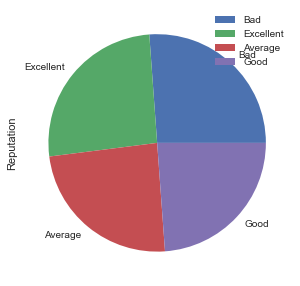

In [428]:
rep=pd.DataFrame(sup['Reputation'].value_counts())
# rep=transformed_df[['onehotencoder__x0_Average','onehotencoder__x0_Bad','onehotencoder__x0_Excellent','onehotencoder__x0_Good']].value_counts()
plot = rep.plot.pie(subplots=True, figsize=(5, 5))
rep

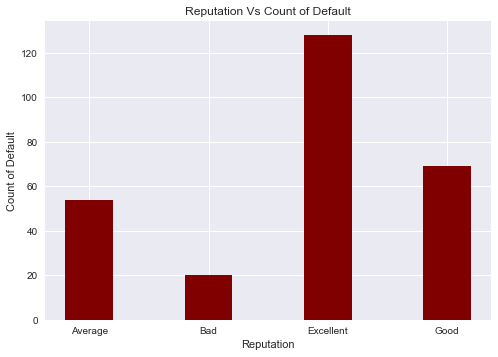

In [429]:
rep_default=pd.DataFrame(sup_clean.groupby(['Reputation']).sum()['Supplier’s default'])
rep_default.reset_index(inplace=True)

plt.bar(rep_default['Reputation'], rep_default['Supplier’s default'], color ='maroon',
        width = 0.4)

plt.xlabel("Reputation")
plt.ylabel("Count of Default")
plt.title("Reputation Vs Count of Default")
plt.show()
# plot = rep_default.plot.pie(subplots=True, figsize=(5, 5))

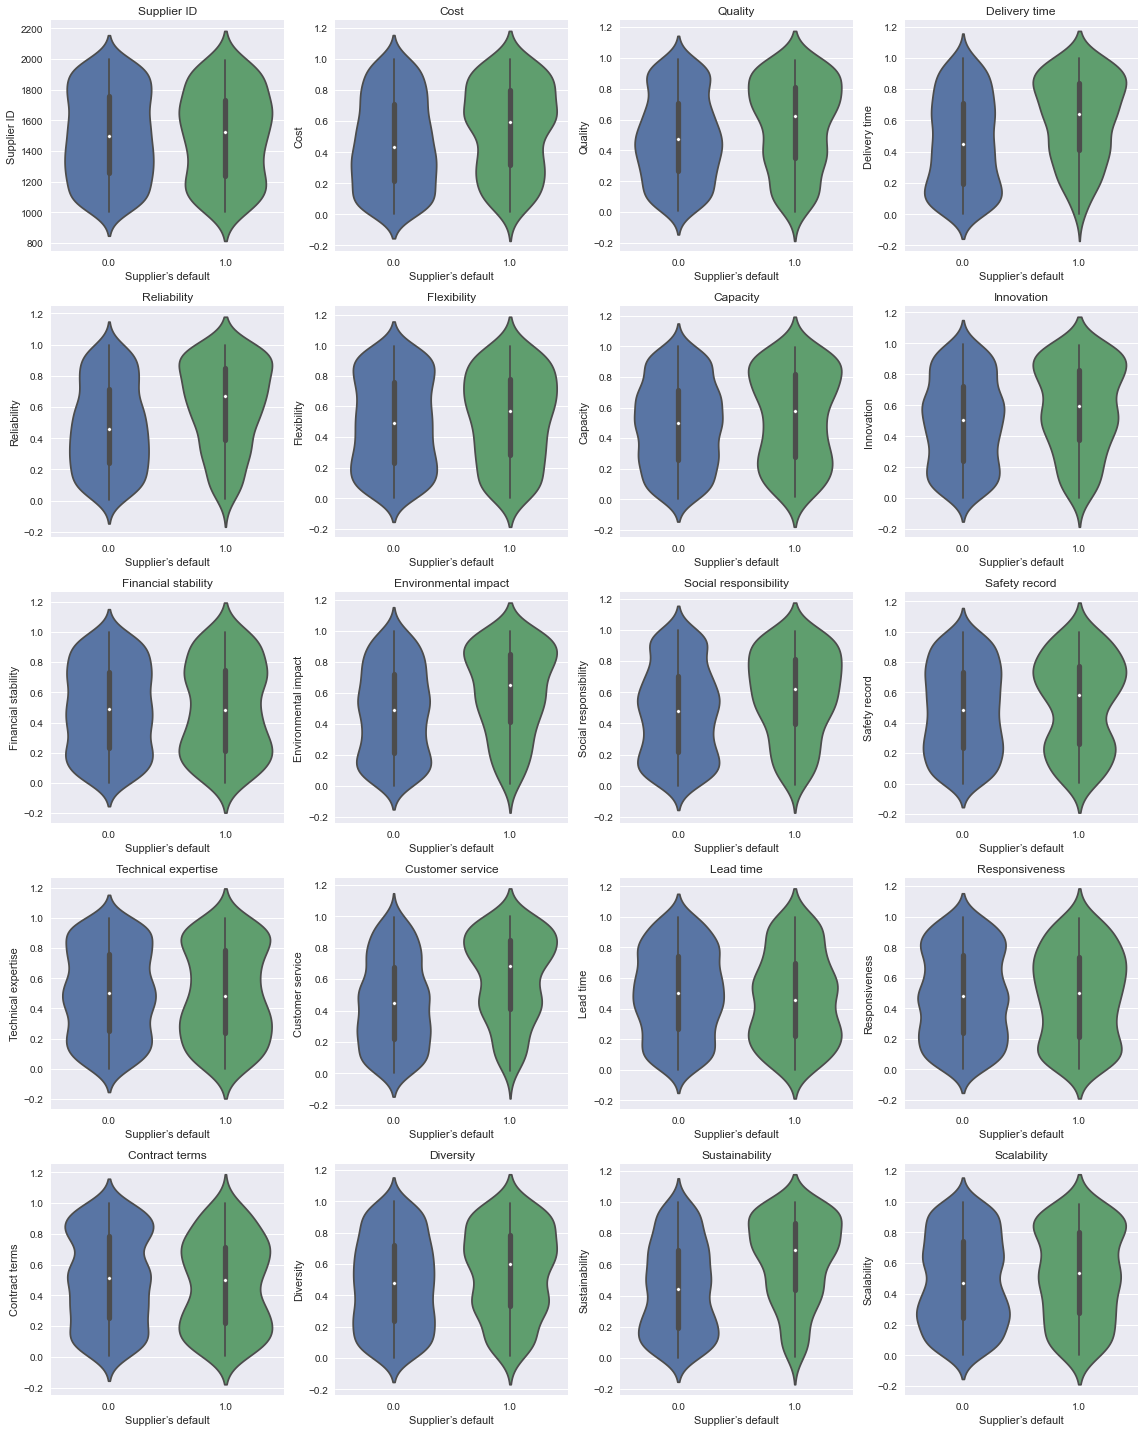

In [430]:
plt.figure(figsize=(16, 20))
for column_index, column in enumerate(sup2.columns[:-1]):
    plt.subplot(5, 4, column_index + 1)
    sns.violinplot(x='Supplier’s default', y=column, data=sup2)
    plt.title(column)
plt.tight_layout()
plt.show()

##### We can observe that Quality, Delivery Time, Reliability, Customer Service & Sustainability are feature varibiable that seem to have stronger impact on prediction of supplier default. 

### Pie Chart

#### 4. Data Imbalance: 

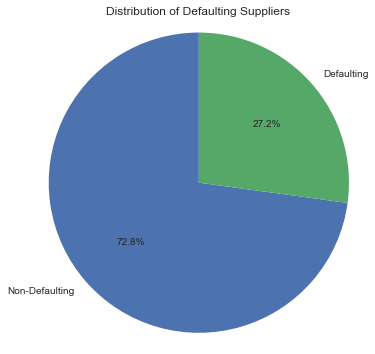

In [431]:
class_counts = transformed_df['Supplier’s default'].value_counts()

# Plot the class distribution
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=['Non-Defaulting', 'Defaulting'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Defaulting Suppliers')
plt.axis('equal')
plt.show()

#### We observe the training set is imbalanced with more information about non-defaulting suppliers

### One Hot Encoding

#### 5. Converting all categorical columns to numerical columns using one hot encoding.


In [432]:
# Using make_column_transformer to One-Hot Encode
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from seaborn import load_dataset
import pandas as pd

# df = load_dataset('penguins')

transformer = make_column_transformer(
    (OneHotEncoder(), ['Reputation']),
    remainder='passthrough')

transformed = transformer.fit_transform(sup_clean)
transformed_df = pd.DataFrame(
    transformed, 
    columns=transformer.get_feature_names()
)
transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   onehotencoder__x0_Average    998 non-null    float64
 1   onehotencoder__x0_Bad        998 non-null    float64
 2   onehotencoder__x0_Excellent  998 non-null    float64
 3   onehotencoder__x0_Good       998 non-null    float64
 4   Supplier ID                  998 non-null    float64
 5   Cost                         998 non-null    float64
 6   Quality                      998 non-null    float64
 7   Delivery time                998 non-null    float64
 8   Reliability                  998 non-null    float64
 9   Flexibility                  998 non-null    float64
 10  Capacity                     998 non-null    float64
 11  Innovation                   998 non-null    float64
 12  Financial stability          998 non-null    float64
 13  Environmental impact

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [433]:
transformed_df.head()

,onehotencoder__x0_Average,onehotencoder__x0_Bad,onehotencoder__x0_Excellent,onehotencoder__x0_Good,Supplier ID,Cost,Quality,Delivery time,Reliability,Flexibility,...,Safety record,Technical expertise,Customer service,Lead time,Responsiveness,Contract terms,Diversity,Sustainability,Scalability,Supplier’s default
0,0.0,1.0,0.0,0.0,1001.0,0.874,0.758,0.082,0.114,0.082,...,0.130,0.947,0.463,0.969,0.044,0.812,0.044,0.853,0.663,0.0
1,0.0,0.0,0.0,1.0,1002.0,0.972,0.694,0.955,0.963,0.244,...,0.033,0.242,0.867,0.523,0.583,0.968,0.490,0.515,0.028,1.0
2,0.0,0.0,1.0,0.0,1003.0,0.827,0.413,0.199,0.577,0.127,...,0.060,0.192,0.446,0.145,0.568,0.081,0.822,0.826,0.158,1.0
3,1.0,0.0,0.0,0.0,1004.0,0.422,0.555,0.969,0.760,0.773,...,0.209,0.280,0.699,0.863,0.423,0.271,0.960,0.469,0.914,0.0
4,0.0,1.0,0.0,0.0,1005.0,0.767,0.958,0.915,0.719,0.715,...,0.351,0.131,0.406,0.963,0.939,0.981,0.004,0.013,0.575,0.0


#### 6. Dividing the dataset in to training (80%) and testing (20%)

In [434]:
from sklearn.model_selection import train_test_split
transformed_df.drop('Supplier ID',axis=1,inplace=True)
X = transformed_df.drop('Supplier’s default', axis = 1).values
y = transformed_df['Supplier’s default'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
y_train.shape

(798,)

#### 7. Using multiple classification algorithms to build the classifier. 

In [435]:
#importing additional packages to test different models and their prediction accuracy

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score

#### A) Logistic Regression

In [532]:
result=[] # To add evaluation metrics of different models
logr_clf = LogisticRegression()
logr_clf.fit(X_train, y_train)
y_logr_pred = logr_clf.predict(X_test)
# y_logr_pred

Accuracy Score -  0.885


Text(0.5, 29.5, 'Predicted label')

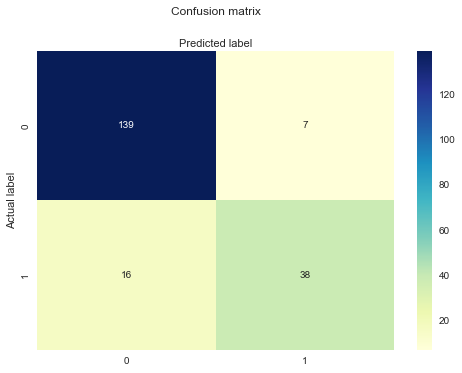

In [533]:
print("Accuracy Score - ",accuracy_score(y_test, y_logr_pred))

cnf_matrix = metrics.confusion_matrix(y_test, y_logr_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
# plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [534]:
from sklearn.model_selection import cross_val_score

In [535]:
score_lr=cross_val_score(LogisticRegression(), X_train, y_train,cv=5)
print(score_lr)
print("Avg :",np.average(score_lr))

[0.8625     0.8375     0.85625    0.82389937 0.89937107]
Avg : 0.8559040880503146


In [536]:
TP = cnf_matrix[1,1] # true positive
TN = cnf_matrix[0,0] # true negatives
FP = cnf_matrix[0,1] # false positives
FN = cnf_matrix[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model

Sensistivity_lr = TP / float(TP+FN)

# 0.7379679144385026
# Let us calculate specificity

Specificity_lr = TN / float(TN+FP)
# 0.7228571428571429

precision_lr=TP/(TP+FP)
recall_lr = TP/(TP+FN)

f1_lr= (2*precision_lr*recall_lr)/(precision_lr+recall_lr)


# AUC Calculation

pred_prob_lr=logr_clf.predict_proba(X_test)

# roc curve for models
fpr_lr, tpr_lr, thresh_lr = roc_curve(y_test, pred_prob_lr[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

from sklearn.metrics import roc_auc_score

# auc scores
auc_score_lr = roc_auc_score(y_test, pred_prob_lr[:,1])

#### Evaluation Logistic Regression

In [537]:
print("Accuracy Decision Tree -  ",np.average(score_lr))
print("Sensitivity Logistic Regression - ",Sensistivity_lr)
print("Specificity Logistic Regression - ",Specificity_lr)
print("F1 Score Logistic Regression - ",f1_lr)
print("AUC Score Logistic Regression - ",auc_score_lr)
result.append(["Logistic Regression",np.average(score_lr),Sensistivity_lr,Specificity_lr,f1_lr,auc_score_lr])
# print(result)

Accuracy Decision Tree -   0.8559040880503146
Sensitivity Logistic Regression -  0.7037037037037037
Specificity Logistic Regression -  0.952054794520548
F1 Score Logistic Regression -  0.7676767676767676
AUC Score Logistic Regression -  0.9534500253678335


#### B) Decision Tree

In [538]:
tree_clf = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
tree_clf.fit(X_train, y_train)
y_tree_pred = tree_clf.predict(X_test)
# y_tree_pred

Accuracy Score -  0.74


Text(0.5, 29.5, 'Predicted label')

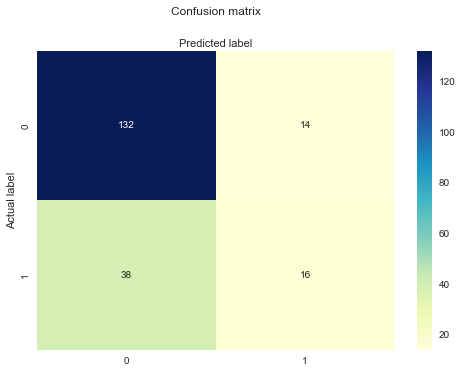

In [539]:
print("Accuracy Score - ",accuracy_score(y_test, y_tree_pred))

cnf_matrix = metrics.confusion_matrix(y_test, y_tree_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
# plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [540]:
score_dt=cross_val_score(DecisionTreeClassifier(max_depth = 4, criterion = 'entropy'), X_train, y_train,cv=5)
print(score_dt)
print("Avg :",np.average(score_dt))

[0.8125     0.73125    0.78125    0.62893082 0.77987421]
Avg : 0.7467610062893082


In [541]:
TP = cnf_matrix[1,1] # true positive
TN = cnf_matrix[0,0] # true negatives
FP = cnf_matrix[0,1] # false positives
FN = cnf_matrix[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model

Sensistivity_dt = TP / float(TP+FN)

# 0.7379679144385026
# Let us calculate specificity

Specificity_dt = TN / float(TN+FP)
# 0.7228571428571429

precision_dt=TP/(TP+FP)
recall_dt = TP/(TP+FN)

f1_dt= (2*precision_dt*recall_dt)/(precision_dt+recall_dt)

# AUC Calculation

pred_prob_dt=tree_clf.predict_proba(X_test)

# roc curve for models
fpr_dt, tpr_dt, thresh_dt = roc_curve(y_test, pred_prob_dt[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

from sklearn.metrics import roc_auc_score

# auc scores
auc_score_dt = roc_auc_score(y_test, pred_prob_dt[:,1])

##### Evaluation Decision Tree

In [542]:
print("Accuracy Decision Tree  - ",np.average(score_dt))
print("Sensitivity Decision Tree - ",Sensistivity_dt)
print("Specificity Decision Tree - ",Specificity_dt)
print("F1 Score Decision Tree - ",f1_dt)
print("AUC Score Decision Tree - ",auc_score_dt)
result.append(["Decision Tree",np.average(score_dt),Sensistivity_dt,Specificity_dt,f1_dt,auc_score_dt])

Accuracy Decision Tree  -  0.7467610062893082
Sensitivity Decision Tree -  0.2962962962962963
Specificity Decision Tree -  0.9041095890410958
F1 Score Decision Tree -  0.38095238095238093
AUC Score Decision Tree -  0.7247590055809234


#### C) XG Boost

In [543]:
xgb_clf = XGBClassifier(max_depth = 4)
xgb_clf.fit(X_train, y_train)
y_xgb_pred = xgb_clf.predict(X_test)
# y_xgb_pred

Accuracy Score -  0.88


Text(0.5, 29.5, 'Predicted label')

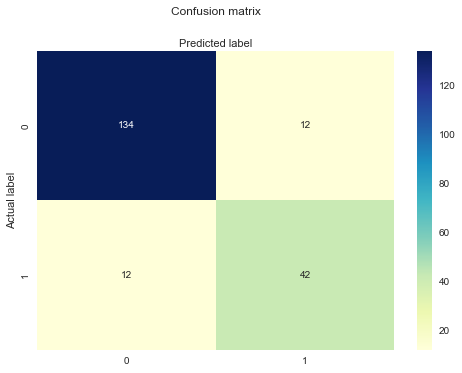

In [544]:
print("Accuracy Score - ",accuracy_score(y_test, y_xgb_pred))

cnf_matrix = metrics.confusion_matrix(y_test, y_xgb_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
# plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [545]:
score_xg=cross_val_score(XGBClassifier(max_depth = 4), X_train, y_train,cv=5)
print(score_xg)
print("Avg :",np.average(score_xg))

[0.86875    0.84375    0.81875    0.81761006 0.86163522]
Avg : 0.8420990566037737


In [546]:
TP = cnf_matrix[1,1] # true positive
TN = cnf_matrix[0,0] # true negatives
FP = cnf_matrix[0,1] # false positives
FN = cnf_matrix[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model

Sensitivity_xg = TP / float(TP+FN)

# 0.7379679144385026
# Let us calculate specificity

Specificity_xg = TN / float(TN+FP)
# 0.7228571428571429

precision_xg=TP/(TP+FP)
recall_xg = TP/(TP+FN)

f1_xg= (2*precision_xg*recall_xg)/(precision_xg+recall_xg)

# AUC Calculation

pred_prob_xg=xgb_clf.predict_proba(X_test)

# roc curve for models
fpr_xg, tpr_xg, thresh_xg = roc_curve(y_test, pred_prob_xg[:,1], pos_label=1)
# fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

from sklearn.metrics import roc_auc_score

# auc scores
auc_score_xg = roc_auc_score(y_test, pred_prob_xg[:,1])
# auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])


#### Evaluation XG Boost

In [547]:
print("Accuracy XG Boost  - ",np.average(score_xg))
print("Sensitivity XG Boost - ",Sensitivity_xg)
print("Specificity XG Boost - ",Specificity_xg)
print("F1 Score XG Boost - ",f1_xg)
print("AUC Score XG Boost - ",auc_score_xg)
result.append(["XG Boost",np.average(score_xg),Sensitivity_xg,Specificity_xg,f1_xg,auc_score_xg])

Accuracy XG Boost  -  0.8420990566037737
Sensitivity XG Boost -  0.7777777777777778
Specificity XG Boost -  0.9178082191780822
F1 Score XG Boost -  0.7777777777777778
AUC Score XG Boost -  0.9315068493150686


#### D) ADA Boost

In [548]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),n_estimators=200, algorithm="SAMME.R",learning_rate=0.5, random_state=42)

ada_clf.fit(X_train,y_train)
y_ada_pred = ada_clf.predict(X_test)
# y_ada_pred

Accuracy Score -  0.785


Text(0.5, 29.5, 'Predicted label')

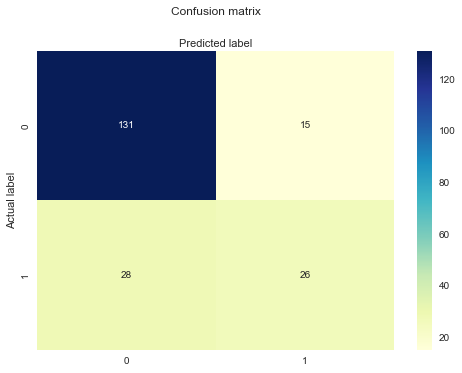

In [549]:
print("Accuracy Score - ",accuracy_score(y_test, y_ada_pred))

cnf_matrix = metrics.confusion_matrix(y_test, y_ada_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
# plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [550]:
score_ada=cross_val_score(AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),n_estimators=200, algorithm="SAMME.R",learning_rate=0.5, random_state=42), X_train, y_train,cv=5)
print(score_ada)
print("Avg :",np.average(score_ada))

[0.83125    0.775      0.81875    0.80503145 0.83018868]
Avg : 0.8120440251572327


In [551]:
TP = cnf_matrix[1,1] # true positive
TN = cnf_matrix[0,0] # true negatives
FP = cnf_matrix[0,1] # false positives
FN = cnf_matrix[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model

Sensitivity_ada = TP / float(TP+FN)

# 0.7379679144385026
# Let us calculate specificity

Specificity_ada = TN / float(TN+FP)
# 0.7228571428571429

precision_ada=TP/(TP+FP)
recall_ada = TP/(TP+FN)

f1_ada= (2*precision_ada*recall_ada)/(precision_ada+recall_ada)

# AUC Calculation

pred_prob_ada=ada_clf.predict_proba(X_test)

# roc curve for models
fpr_ada, tpr_ada, thresh_ada = roc_curve(y_test, pred_prob_ada[:,1], pos_label=1)
# fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

from sklearn.metrics import roc_auc_score

# auc scores
auc_score_ada = roc_auc_score(y_test, pred_prob_ada[:,1])
# auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])


#### Evaluation ADA Boost

In [552]:
print("Accuracy ADA Boost  - ",np.average(score_ada))
print("Sensitivity ADA Boost - ",Sensitivity_ada)
print("Specificity ADA Boost - ",Specificity_ada)
print("F1 Score ADA Boost - ",f1_ada)
print("AUC Score ADA Boost - ",auc_score_ada)
result.append(["ADA Boost",np.average(score_ada),Sensitivity_ada,Specificity_ada,f1_ada,auc_score_ada])

Accuracy ADA Boost  -  0.8120440251572327
Sensitivity ADA Boost -  0.48148148148148145
Specificity ADA Boost -  0.8972602739726028
F1 Score ADA Boost -  0.5473684210526316
AUC Score ADA Boost -  0.8595890410958904


#### E) Random Forest

In [553]:
rdf_clf = RandomForestClassifier(max_depth = 4)
rdf_clf.fit(X_train, y_train)
y_rdf_pred = rdf_clf.predict(X_test)
# y_rdf_pred

Accuarcy Score -  0.76


Text(0.5, 29.5, 'Predicted label')

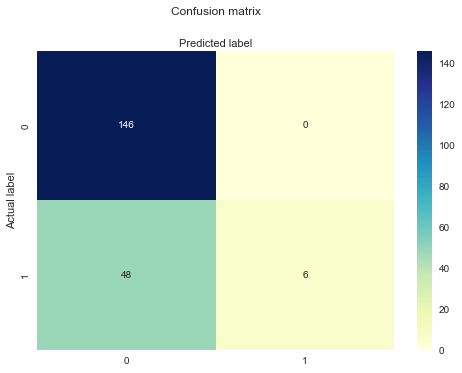

In [554]:
print("Accuarcy Score - ",accuracy_score(y_test, y_rdf_pred))

cnf_matrix = metrics.confusion_matrix(y_test, y_rdf_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
# plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [555]:
score_rf=cross_val_score(RandomForestClassifier(max_depth = 4), X_train, y_train,cv=5)
print(score_rf)
print("Avg :",np.average(score_rf))

[0.75625    0.7875     0.7375     0.77358491 0.77987421]
Avg : 0.766941823899371


In [556]:
TP = cnf_matrix[1,1] # true positive
TN = cnf_matrix[0,0] # true negatives
FP = cnf_matrix[0,1] # false positives
FN = cnf_matrix[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model

Sensitivity_rf = TP / float(TP+FN)

# 0.7379679144385026
# Let us calculate specificity

Specificity_rf = TN / float(TN+FP)
# 0.7228571428571429

precision_rf=TP/(TP+FP)
recall_rf = TP/(TP+FN)

f1_rf= (2*precision_rf*recall_rf)/(precision_rf+recall_rf)


# AUC Calculation

pred_prob_rf=rdf_clf.predict_proba(X_test)

# roc curve for models
fpr_rf, tpr_rf, thresh_rf = roc_curve(y_test, pred_prob_rf[:,1], pos_label=1)
# fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

from sklearn.metrics import roc_auc_score

# auc scores
auc_score_rdf = roc_auc_score(y_test, pred_prob_rf[:,1])
# auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])


#### Evaluation Random Forrest Algorithm 

In [557]:
print("Accuracy Random Forrest - ",np.average(score_rf))
print("Sensitivity Random Forrest - ",Sensitivity_rf)
print("Specificity Random Forrest - ",Specificity_rf)
print("F1 Score Random Forrest - ",f1_rf)
print("AUC Score Random Forrest Classifier - ",auc_score_rdf)
result.append(["Random Forest",np.average(score_rf),Sensitivity_rf,Specificity_rf,f1_rf,auc_score_rdf])

Accuracy Random Forrest -  0.766941823899371
Sensitivity Random Forrest -  0.1111111111111111
Specificity Random Forrest -  1.0
F1 Score Random Forrest -  0.19999999999999998
AUC Score Random Forrest Classifier -  0.908802638254693


#### 8. Evaluation Metrics Comparison

In [558]:
results_df = pd.DataFrame(result, columns=['Classifier', 'Accuracy', 'Sensitivity', 'Specificity', 'F1-Score', 'AUC Score'])
results_df

,Classifier,Accuracy,Sensitivity,Specificity,F1-Score,AUC Score
0,Logistic Regression,0.855904,0.703704,0.952055,0.767677,0.953450
1,Decision Tree,0.746761,0.296296,0.904110,0.380952,0.724759
2,XG Boost,0.842099,0.777778,0.917808,0.777778,0.931507
3,ADA Boost,0.812044,0.481481,0.897260,0.547368,0.859589
4,Random Forest,0.766942,0.111111,1.000000,0.200000,0.908803


#### 9. ROC Curve

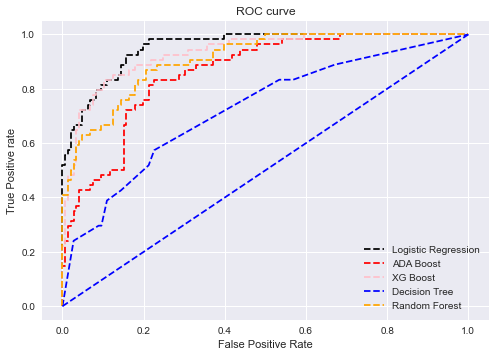

In [559]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr_lr, tpr_lr, linestyle='--',color='black', label='Logistic Regression')
plt.plot(fpr_ada, tpr_ada, linestyle='--',color='red', label='ADA Boost')
plt.plot(fpr_xg, tpr_xg, linestyle='--',color='pink', label='XG Boost')
plt.plot(fpr_dt, tpr_dt, linestyle='--',color='blue', label='Decision Tree')
plt.plot(fpr_rf, tpr_rf, linestyle='--',color='orange', label='Random Forest')

# plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

#### 10. Selection of classifer

##### We can see that XG Boost and Logistic Regression have produced the best predictions based on accuracy, f1-score and AUC score. However, as we are working with an imbalanced training set, we select XG Boost for making prediction based on the highest f1 score. F1 is a better evaluation criteria for imbalanced data

#### 11. Predicting supplier’s risk of New supplier data.csv.

In [623]:
new_sup = pd.read_csv('new_supplier_data.csv')
new_df =new_sup[["Supplier ID"]]

In [624]:
new_sup.shape

(5, 21)

In [625]:
new_sup.head()

,Supplier ID,Cost,Quality,Delivery time,Reliability,Flexibility,Capacity,Innovation,Reputation,Financial stability,...,Social responsibility,Safety record,Technical expertise,Customer service,Lead time,Responsiveness,Contract terms,Diversity,Sustainability,Scalability
0,Supplier 1,0.671,0.554,0.455,0.366,0.952,0.756,0.239,Average,0.777,...,0.318,0.143,0.679,0.502,0.150,0.400,0.039,0.277,0.829,0.077
1,Supplier 2,0.674,0.393,0.688,0.507,0.693,0.469,0.338,Bad,0.619,...,0.823,0.204,0.118,0.757,0.256,0.488,0.007,0.977,0.835,0.566
2,Supplier 3,0.788,0.572,0.845,0.148,0.426,0.879,0.364,Good,0.841,...,0.312,0.211,0.129,0.315,0.497,0.316,0.309,0.380,0.309,0.487
3,Supplier 4,0.848,0.368,0.481,0.773,0.172,0.206,0.154,Average,0.763,...,0.984,0.919,0.500,0.450,0.546,0.452,0.108,0.317,0.005,0.737
4,Supplier 5,0.260,0.795,0.957,0.879,0.061,0.778,0.900,Bad,0.863,...,0.316,0.728,0.447,0.003,0.826,0.435,0.464,0.803,0.882,0.548


In [626]:
new_sup.drop(['Supplier ID'],axis=1,inplace=True)

In [627]:
# Using make_column_transformer to One-Hot Encode
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from seaborn import load_dataset
import pandas as pd

# df = load_dataset('penguins')

transformer = make_column_transformer(
    (OneHotEncoder(), ['Reputation']),
    remainder='passthrough')

transformed = transformer.fit_transform(new_sup)
new_sup_t = pd.DataFrame(
    transformed, 
    columns=transformer.get_feature_names()
)

new_sup_t['onehotencoder__x0_Excellent']=0
new_sup_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   onehotencoder__x0_Average    5 non-null      float64
 1   onehotencoder__x0_Bad        5 non-null      float64
 2   onehotencoder__x0_Good       5 non-null      float64
 3   Cost                         5 non-null      float64
 4   Quality                      5 non-null      float64
 5   Delivery time                5 non-null      float64
 6   Reliability                  5 non-null      float64
 7   Flexibility                  5 non-null      float64
 8   Capacity                     5 non-null      float64
 9   Innovation                   5 non-null      float64
 10  Financial stability          5 non-null      float64
 11  Environmental impact         5 non-null      float64
 12  Social responsibility        5 non-null      float64
 13  Safety record           

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


#### Since the new supplier data set do not have and vendor with Reputation = Excellent, we have added a new column after On Hot Encoding with values 0

In [628]:
xgb_clf.predict(new_sup_t)

array([0, 0, 0, 1, 1])

In [629]:
xgb_clf.predict_proba(new_sup_t)[:,1]

array([2.4057226e-03, 6.1856216e-04, 6.0152793e-03, 7.4394047e-01,
       8.2599461e-01], dtype=float32)

In [630]:
risk=list(xgb_clf.predict_proba(new_sup_t)[:,1])
risk

[0.0024057226, 0.00061856216, 0.0060152793, 0.7439405, 0.8259946]

#### 12. Incorporating this information in the objective function of Vivo Supplier Selection problem by assuming that the risk scales at a cost rate of Rs 80,000. What would be your new supplier selection plan?

In [1]:
from ortools.linear_solver import pywraplp
import numpy as np

ModuleNotFoundError: No module named 'ortools'

In [688]:
discounts = [
    [7,22,25,34,35],
    [30,18,18,31,26],
    [21,30,34,12,14],
    [27,29,30,60,6],
    [31,25,10,13,30],
    [23,32,15,60,9],
    [6,21,18,60,28],
    [17,18,6,8,31]
]

demand = [592, 446,548, 647, 245, 797, 603, 401]
list_price =[870,630,960,400,980,510,830,550]
risk=list(xgb_clf.predict_proba(new_sup_t)[:,1])
fixed_admin_cost = 50000
reliability=0.8
risk_cost=80000
num_product =len(discounts)
num_supplier =len(discounts[1])

In [689]:
solver =pywraplp.Solver.CreateSolver('SCIP')

In [690]:
infinity =solver.infinity()

y={}
for j in range(num_supplier):
    y[j]=solver.IntVar(0,1,'y[%i]'%(j+1))
print(y)

{0: y[1], 1: y[2], 2: y[3], 3: y[4], 4: y[5]}


In [691]:
x_var ={}
for i in range(num_product):
    x_var[i]=[solver.IntVar(0,infinity,'x[%d][%d]' %((i+1),(j+1))) for j in range(num_supplier)]
    
print(x_var)

{0: [x[1][1], x[1][2], x[1][3], x[1][4], x[1][5]], 1: [x[2][1], x[2][2], x[2][3], x[2][4], x[2][5]], 2: [x[3][1], x[3][2], x[3][3], x[3][4], x[3][5]], 3: [x[4][1], x[4][2], x[4][3], x[4][4], x[4][5]], 4: [x[5][1], x[5][2], x[5][3], x[5][4], x[5][5]], 5: [x[6][1], x[6][2], x[6][3], x[6][4], x[6][5]], 6: [x[7][1], x[7][2], x[7][3], x[7][4], x[7][5]], 7: [x[8][1], x[8][2], x[8][3], x[8][4], x[8][5]]}


In [692]:
# Constraints

# Reliability 

for i in range (num_product):
    for j in range (num_supplier):
        solver.Add(x_var[i][j] <=reliability*demand[i]*y[j])
        
# Demand Satisfaction Constraint
for i in range (num_product):
    expr =[x_var[i][j] for j in range(num_supplier)]
    solver.Add(sum(expr) >= demand[i])
    
print('Number of Constraints = ', solver.NumConstraints())

Number of Constraints =  48


In [693]:
objective_terms=[]

for j in range (num_supplier):
    objective_terms.append(fixed_admin_cost*y[j])
    
for i in range (num_product):
    for j in range (num_supplier):
        objective_terms.append((1-(discounts[i][j])/100) *list_price[i] * x_var[i][j])

#### Adding risk of Supplier into Objective

In [694]:
for k in range (num_supplier):
    objective_terms.append(risk_cost*risk[k]*y[k])

In [695]:
solver.Minimize(solver.Sum(objective_terms))

status =solver.Solve()

In [696]:
if status == pywraplp.Solver.OPTIMAL:
    print ('Minimum Cost incurred to satisfy demand = ', solver.Objective().Value())
    print()
    for j in range(num_supplier):
        print(y[j] , ' = ', y[j].solution_value())
    
    for i in range(num_product):
        print()
        
        for j in range(num_supplier):
            if (round(x_var[i][j].solution_value(),2)==-0.0):
                print (x_var[i][j], ' = ', 0.0, ' ~ ',end='  ')
            else:
                print(x_var[i][j], ' = ', round(x_var[i][j].solution_value(),2), ' ~ ',end='  ')
                
else:
    print ('The problem does not have an optimal solution')

Minimum Cost incurred to satisfy demand =  2016009.0227810694

y[1]  =  0.0
y[2]  =  1.0
y[3]  =  0.0
y[4]  =  1.0
y[5]  =  0.0

x[1][1]  =  0.0  ~   x[1][2]  =  119.0  ~   x[1][3]  =  0.0  ~   x[1][4]  =  473.0  ~   x[1][5]  =  0.0  ~   
x[2][1]  =  0.0  ~   x[2][2]  =  90.0  ~   x[2][3]  =  0.0  ~   x[2][4]  =  356.0  ~   x[2][5]  =  0.0  ~   
x[3][1]  =  0.0  ~   x[3][2]  =  438.0  ~   x[3][3]  =  0.0  ~   x[3][4]  =  110.0  ~   x[3][5]  =  0.0  ~   
x[4][1]  =  0.0  ~   x[4][2]  =  130.0  ~   x[4][3]  =  0.0  ~   x[4][4]  =  517.0  ~   x[4][5]  =  0.0  ~   
x[5][1]  =  0.0  ~   x[5][2]  =  196.0  ~   x[5][3]  =  0.0  ~   x[5][4]  =  49.0  ~   x[5][5]  =  0.0  ~   
x[6][1]  =  0.0  ~   x[6][2]  =  160.0  ~   x[6][3]  =  0.0  ~   x[6][4]  =  637.0  ~   x[6][5]  =  0.0  ~   
x[7][1]  =  0.0  ~   x[7][2]  =  121.0  ~   x[7][3]  =  0.0  ~   x[7][4]  =  482.0  ~   x[7][5]  =  0.0  ~   
x[8][1]  =  0.0  ~   x[8][2]  =  320.0  ~   x[8][3]  =  0.0  ~   x[8][4]  =  81.0  ~   x[8][5]  =  0.0 

#### 13. Sensitivity analysis by considering a few other cost rates such as Rs 60,000, Rs. 90,000 etc

In [675]:
for cost in (60000,80000,90000,200000):

    from ortools.linear_solver import pywraplp
    import numpy as np

    discounts = [
        [7,22,25,34,35],
        [30,18,18,31,26],
        [21,30,34,12,14],
        [27,29,30,60,6],
        [31,25,10,13,30],
        [23,32,15,60,9],
        [6,21,18,60,28],
        [17,18,6,8,31]
    ]

    demand = [592, 446,548, 647, 245, 797, 603, 401]
    list_price =[870,630,960,400,980,510,830,550]
    risk=list(xgb_clf.predict_proba(new_sup_t)[:,1])
    fixed_admin_cost = 50000
    reliability=0.8
    risk_cost=cost
    num_product =len(discounts)
    num_supplier =len(discounts[1])

    solver =pywraplp.Solver.CreateSolver('SCIP')

    infinity =solver.infinity()

    y={}
    for j in range(num_supplier):
        y[j]=solver.IntVar(0,1,'y[%i]'%(j+1))
    # print(y)

    x_var ={}
    for i in range(num_product):
        x_var[i]=[solver.NumVar(0,infinity,'x[%d][%d]' %((i+1),(j+1))) for j in range(num_supplier)]

    # Constraints

    # Reliability 

    for i in range (num_product):
        for j in range (num_supplier):
            solver.Add(x_var[i][j] <=reliability*demand[i]*y[j])

    # Demand Satisfaction Constraint
    for i in range (num_product):
        expr =[x_var[i][j] for j in range(num_supplier)]
        solver.Add(sum(expr) >= demand[i])

    objective_terms=[]

    for j in range (num_supplier):
        objective_terms.append(fixed_admin_cost*y[j])

    for i in range (num_product):
        for j in range (num_supplier):
            objective_terms.append((1-(discounts[i][j])/100) *list_price[i] * x_var[i][j])

    for k in range (num_supplier):
        objective_terms.append(risk_cost*risk[k]*y[k])

    solver.Minimize(solver.Sum(objective_terms))

    status =solver.Solve()
    
    print("Cost of Risk - ", cost)
    print("Minimum Cost to fulfill Demand - ", solver.Objective().Value())
    print("The selected suppliers are - ", end ="")
    for p in range(5):
        if y[p].solution_value()==1:
            print (p+1,end=",")
            
    print("\n")
#     print(y.solution_value())

Cost of Risk -  60000
Minimum Cost to fulfill Demand -  2000587.0020858021
The selected suppliers are - 2,4,

Cost of Risk -  80000
Minimum Cost to fulfill Demand -  2015478.1827810695
The selected suppliers are - 2,4,

Cost of Risk -  90000
Minimum Cost to fulfill Demand -  2022923.7731287032
The selected suppliers are - 2,4,

Cost of Risk -  200000
Minimum Cost to fulfill Demand -  2104825.266952674
The selected suppliers are - 2,4,



In [676]:
new_df['Default Proability']=risk
new_df

C:\Users\adsakkir\AppData\Local\Temp\ipykernel_13380\1621618961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Default Proability']=risk


,Supplier ID,Default Proability
0,Supplier 1,0.002406
1,Supplier 2,0.000619
2,Supplier 3,0.006015
3,Supplier 4,0.743940
4,Supplier 5,0.825995
